# Housing Price Analysis
This solution is divided into 5 parts which are following:
- Data visualization and Data cleaning
- Data preparation
- Model building
- Prediction and evaluation on data set

# 1. Data visualization and Data cleaning

Import the required libraries and understand/visualize the data.

In [418]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

In [419]:
#Load housing price data and look at top 5 rows of data set
housing_price_data = pd.read_csv('train.csv')
housing_price_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [420]:
housing_price_data.shape

(1460, 81)

In [421]:
housing_price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [422]:
housing_price_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [423]:
#Load data dictionary and understand the meaning of columns in dataset
data_dictionary = open('data_description.txt', 'r')
print(data_dictionary.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

Looking at info of housing price data it seems there are few columns which have null rows. Columns which are having maximum rows as null need to be removed as they don't have sufficient data for analysis.

We should drop columns which are having only 1 unique value or 1 unique value in almost all rows as this infomration can't be used to conlude any dependency. Also we should drop columns which are having null values in more than 10% of rows since it may lead to wrong conclusion.

In [424]:
#Drop columns which are having more than 90% null values and check shape after that
totalRows = len(housing_price_data)
rows_count_90percent = totalRows*.9
housing_price_data.dropna(thresh=rows_count_90percent,axis=1, inplace=True)
housing_price_data.shape

(1460, 75)

In [425]:
#Drop all columns which has only 1 values in all rows
housing_price_data.drop(housing_price_data.nunique()[housing_price_data.nunique() <= 1].index, axis = 1, inplace=True)
housing_price_data.shape

(1460, 75)

In [426]:
#find columns which are having leass than 4 unique values and check if a single value is getting repeated in most of the rows.
for col in housing_price_data.columns:
    if (len(housing_price_data[col].unique()) < 4):
        print(housing_price_data[col].value_counts())

Pave    1454
Grvl       6
Name: Street, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
Y    1365
N      95
Name: CentralAir, dtype: int64
0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64
0    913
1    535
2     12
Name: HalfBath, dtype: int64
Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64


From above results, it can be seen that for street column is having Pave in almost all rows and similarly utilities is having AllPub value in all rows so these 2 columns can be dropped.

In [427]:
housing_price_data = housing_price_data.drop(['Street','Utilities'],axis='columns')

In [428]:
#Id column can also be removed as it can't be used for analysis
housing_price_data.drop(['Id'], axis = 1, inplace=True)
housing_price_data.shape

(1460, 72)

From above queries, 9 columns are dropped from dataset.

# 2. Data preparation

From housing price dataset info, it seems there are multiple year columns. Let's have a look at these columns.

In [429]:
year_columns = ['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold']
housing_price_data[year_columns].head(10)

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008
5,1993,1995,1993.0,2009
6,2004,2005,2004.0,2007
7,1973,1973,1973.0,2009
8,1931,1950,1931.0,2008
9,1939,1950,1939.0,2008


In [430]:
housing_price_data[year_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
YearBuilt       1460 non-null int64
YearRemodAdd    1460 non-null int64
GarageYrBlt     1379 non-null float64
YrSold          1460 non-null int64
dtypes: float64(1), int64(3)
memory usage: 45.8 KB


For analysis purpose, all year columns can be replaced by the age (years old). In order to get this information, individual year has to be compared against the max value of year in a column.
Also there are few null values in GarageYrBlt column which means absence of Garage in house.

In [431]:
housing_price_data['YearBuilt_Old'] = housing_price_data.YearBuilt.max()-housing_price_data.YearBuilt
housing_price_data['YearRemodAdd_Old'] = housing_price_data.YearRemodAdd.max()-housing_price_data.YearRemodAdd
housing_price_data['GarageYrBlt_Old'] = housing_price_data.GarageYrBlt.max()-housing_price_data.GarageYrBlt
housing_price_data['YrSold_Old'] = housing_price_data.YrSold.max()-housing_price_data.YrSold
housing_price_data[['YearBuilt_Old','YearRemodAdd_Old', 'GarageYrBlt_Old','YrSold_Old']].head(5)

,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
0,7,7,7.0,2
1,34,34,34.0,3
2,9,8,9.0,2
3,95,40,12.0,4
4,10,10,10.0,2


In [432]:
#Actual year columns can be removed
housing_price_data.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'], axis=1, inplace=True)
housing_price_data.shape

(1460, 72)

Let's get list of remaining columns having null values and analyze their values.

In [433]:
round(housing_price_data.isnull().sum()/len(housing_price_data.index),2).sort_values(ascending=False).head(15)

GarageType         0.06
GarageYrBlt_Old    0.06
GarageQual         0.06
GarageCond         0.06
GarageFinish       0.06
BsmtExposure       0.03
BsmtCond           0.03
BsmtQual           0.03
BsmtFinType1       0.03
BsmtFinType2       0.03
MasVnrArea         0.01
MasVnrType         0.01
BsmtFinSF1         0.00
Foundation         0.00
ExterCond          0.00
dtype: float64

There are 12 columns in dataset which has few null values. Let's analyze these columns and see if null values can be replaced.

In [434]:
housing_price_data[['GarageType', 'GarageYrBlt_Old', 'GarageQual','GarageCond', 'GarageFinish', 'BsmtExposure', 'BsmtCond',
                   'BsmtQual', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrArea', 'MasVnrType']]

,GarageType,GarageYrBlt_Old,GarageQual,GarageCond,GarageFinish,BsmtExposure,BsmtCond,BsmtQual,BsmtFinType1,BsmtFinType2,MasVnrArea,MasVnrType
0,Attchd,7.0,TA,TA,RFn,No,TA,Gd,GLQ,Unf,196.0,BrkFace
1,Attchd,34.0,TA,TA,RFn,Gd,TA,Gd,ALQ,Unf,0.0,None
2,Attchd,9.0,TA,TA,RFn,Mn,TA,Gd,GLQ,Unf,162.0,BrkFace
3,Detchd,12.0,TA,TA,Unf,No,Gd,TA,ALQ,Unf,0.0,None
4,Attchd,10.0,TA,TA,RFn,Av,TA,Gd,GLQ,Unf,350.0,BrkFace
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,Attchd,11.0,TA,TA,RFn,No,TA,Gd,Unf,Unf,0.0,None
1456,Attchd,32.0,TA,TA,Unf,No,TA,Gd,ALQ,Rec,119.0,Stone
1457,Attchd,69.0,TA,TA,RFn,No,Gd,TA,GLQ,Unf,0.0,None
1458,Attchd,60.0,TA,TA,Unf,Mn,TA,TA,GLQ,Rec,0.0,None


From definitions provided in data dictionary table, TA represents average/typical value, Unf represents unfinished.
- Missing values for BsmtQual, BsmtCond, GarageCond and GarageCond columns can be replaced by 'TA'.
- Missing values for MasVnrArea can be replaced by it's mean value.
- Missing values for BsmtFinType1, BsmtFinType2 and GarageFinish columns can be replaced by 'Unf'.
- Missing values for GarageYrBlt_Old can be replaced by -1 as these houses don't have garage.

In [435]:
housing_price_data.MasVnrType.fillna('None',inplace=True)
housing_price_data.MasVnrArea.fillna(housing_price_data.MasVnrArea.mean(),inplace=True)
housing_price_data.BsmtQual.fillna('TA',inplace=True)
housing_price_data.BsmtCond.fillna('TA',inplace=True)
housing_price_data.BsmtExposure.fillna('No',inplace=True)
housing_price_data.BsmtFinType1.fillna('Unf',inplace=True)
housing_price_data.BsmtFinType2.fillna('Unf',inplace=True)
housing_price_data.GarageType.fillna('Attchd',inplace=True)
housing_price_data.GarageYrBlt_Old.fillna(-1,inplace=True)
housing_price_data.GarageFinish.fillna('Unf',inplace=True)
housing_price_data.GarageQual.fillna('TA',inplace=True)
housing_price_data.GarageCond.fillna('TA',inplace=True)

In [436]:
#Get list of all numeric columns
numeric_variables = list(housing_price_data.dtypes[housing_price_data.dtypes!='object'].index)
numeric_variables

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'SalePrice',
 'YearBuilt_Old',
 'YearRemodAdd_Old',
 'GarageYrBlt_Old',
 'YrSold_Old']

#### Let's plot scatter plots of sales price with numeric variables to understand the relation among these.

In [437]:
import matplotlib.pyplot as plt
import seaborn as sns

In [438]:
def drawScatterPlot(dataset, x, fig):
    plt.subplot(6,3,fig)
    plt.scatter(dataset[x], dataset['SalePrice'])
    plt.title(x +' vs SalePrice')
    plt.ylabel('SalesPrice')
    plt.xlabel(x)

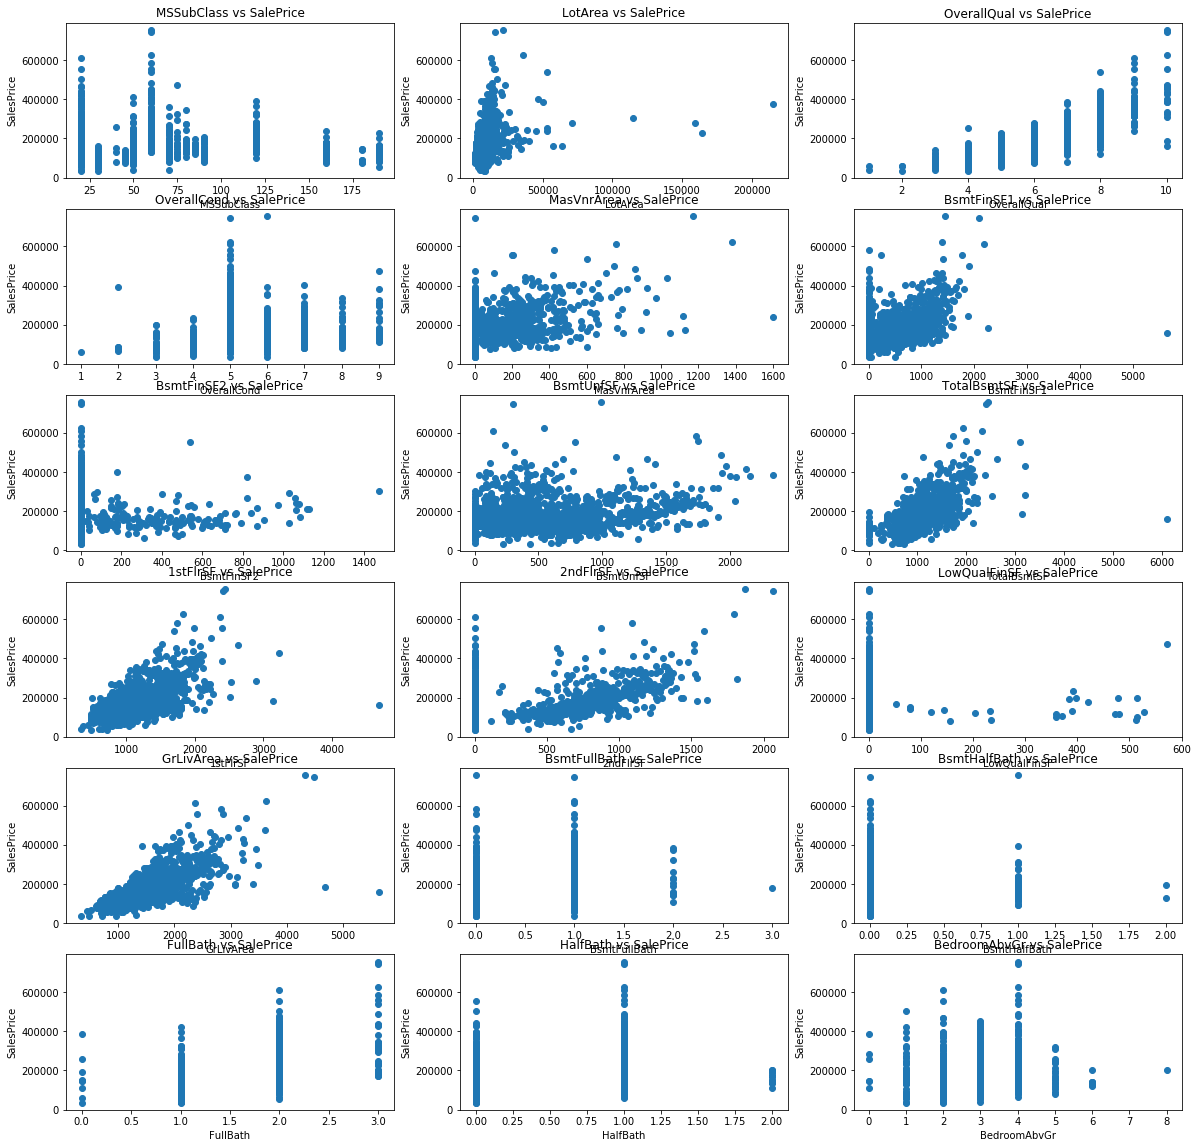

In [371]:
plt.figure(figsize=(20,20))
drawScatterPlot(housing_price_data, 'MSSubClass', 1)
drawScatterPlot(housing_price_data, 'LotArea', 2)
drawScatterPlot(housing_price_data, 'OverallQual', 3)
drawScatterPlot(housing_price_data, 'OverallCond', 4)
drawScatterPlot(housing_price_data, 'MasVnrArea', 5)
drawScatterPlot(housing_price_data, 'BsmtFinSF1', 6)
drawScatterPlot(housing_price_data, 'BsmtFinSF2', 7)
drawScatterPlot(housing_price_data, 'BsmtUnfSF', 8)
drawScatterPlot(housing_price_data, 'TotalBsmtSF', 9)
drawScatterPlot(housing_price_data, '1stFlrSF', 10)
drawScatterPlot(housing_price_data, '2ndFlrSF', 11)
drawScatterPlot(housing_price_data, 'LowQualFinSF', 12)
drawScatterPlot(housing_price_data, 'GrLivArea', 13)
drawScatterPlot(housing_price_data, 'BsmtFullBath', 14)
drawScatterPlot(housing_price_data, 'BsmtHalfBath', 15)
drawScatterPlot(housing_price_data, 'FullBath', 16)
drawScatterPlot(housing_price_data, 'HalfBath', 17)
drawScatterPlot(housing_price_data, 'BedroomAbvGr', 18)

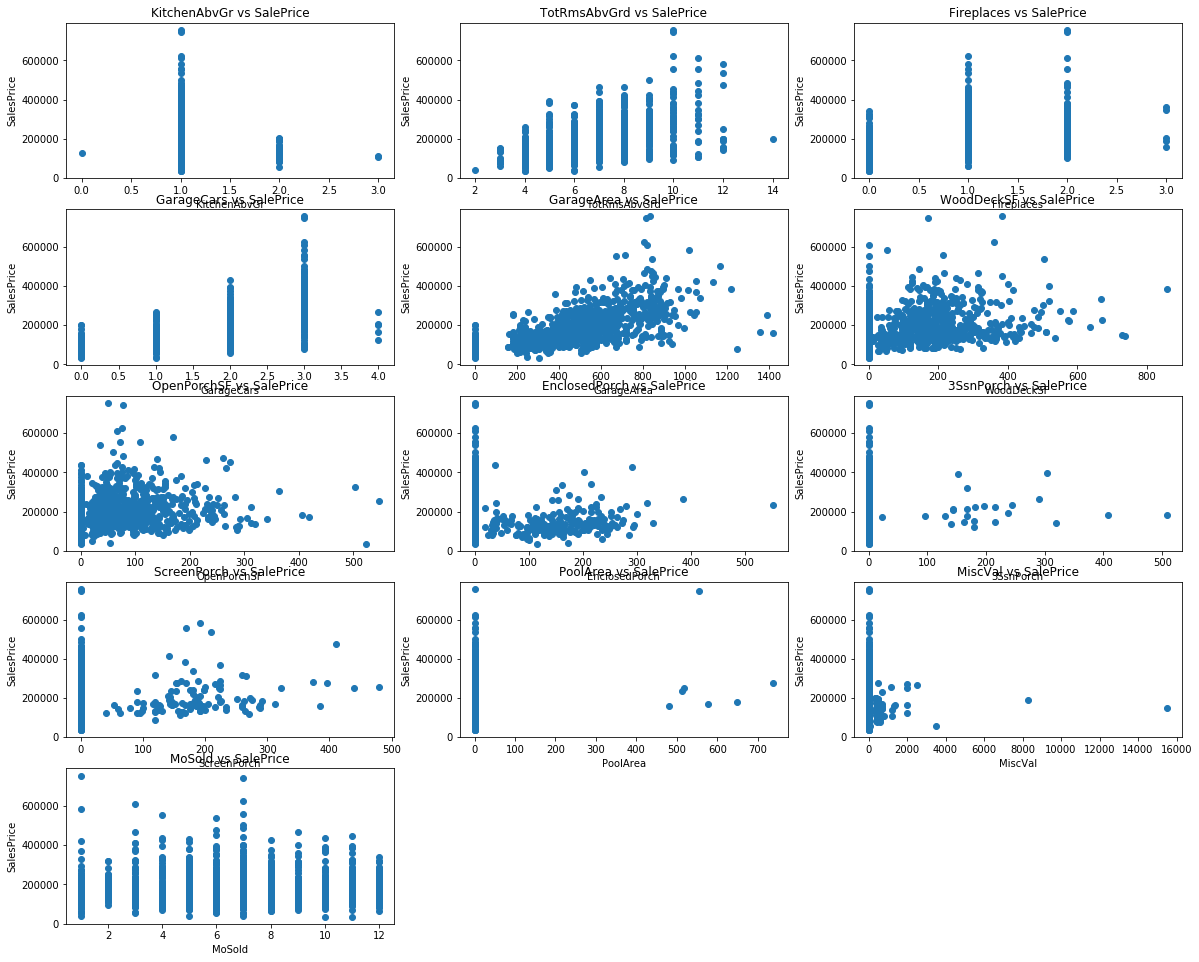

In [372]:
plt.figure(figsize=(20,20))
drawScatterPlot(housing_price_data, 'KitchenAbvGr', 1)
drawScatterPlot(housing_price_data, 'TotRmsAbvGrd', 2)
drawScatterPlot(housing_price_data, 'Fireplaces', 3)
drawScatterPlot(housing_price_data, 'GarageCars', 4)
drawScatterPlot(housing_price_data, 'GarageArea', 5)
drawScatterPlot(housing_price_data, 'WoodDeckSF', 6)
drawScatterPlot(housing_price_data, 'OpenPorchSF', 7)
drawScatterPlot(housing_price_data, 'EnclosedPorch', 8)
drawScatterPlot(housing_price_data, '3SsnPorch', 9)
drawScatterPlot(housing_price_data, 'ScreenPorch', 10)
drawScatterPlot(housing_price_data, 'PoolArea', 11)
drawScatterPlot(housing_price_data, 'MiscVal', 12)
drawScatterPlot(housing_price_data, 'MoSold', 13)

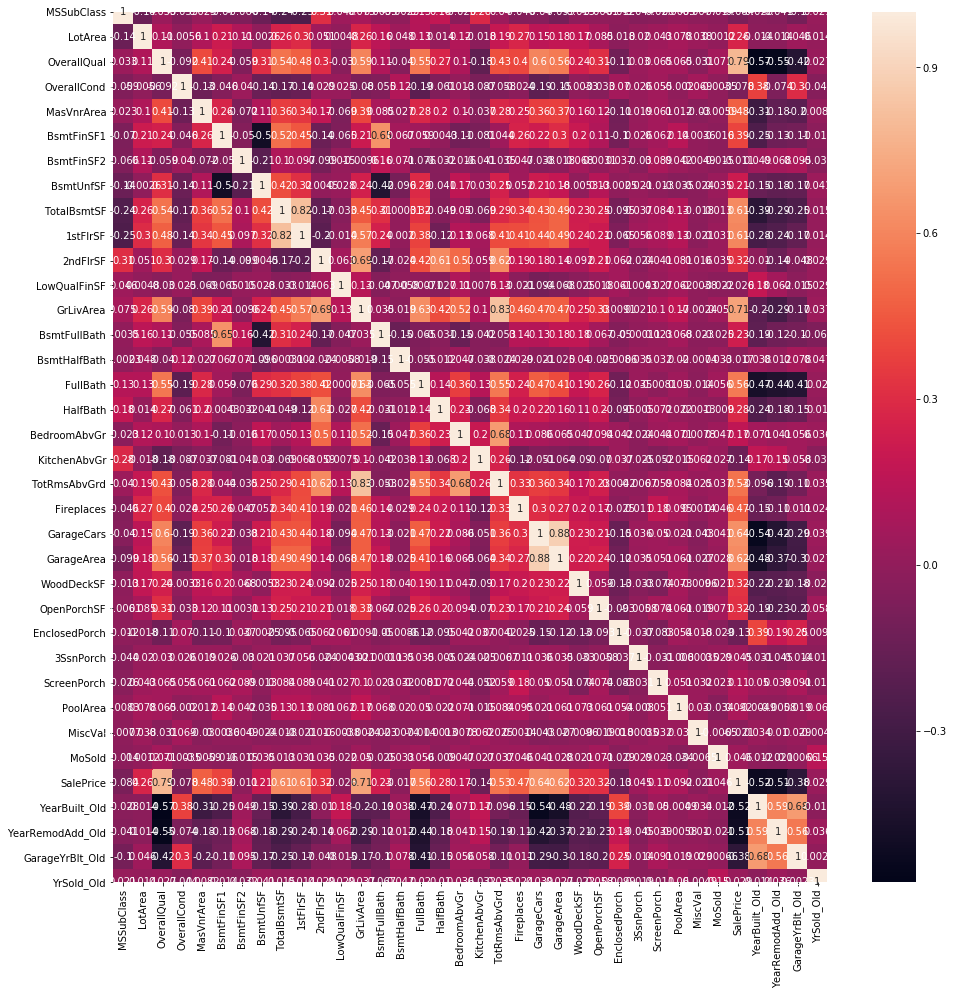

In [373]:
#visualize correlation between numeric variables
plt.figure(figsize=(16,16))
sns.heatmap(housing_price_data[numeric_variables].corr(),annot=True)
plt.show()

#### Let's plot box plots for numerica variables to understand their distribution and outliers.

In [374]:
def drawBoxPlot(dataset, x, fig):
    plt.subplot(3,3, fig)
    plt.boxplot(dataset[x])

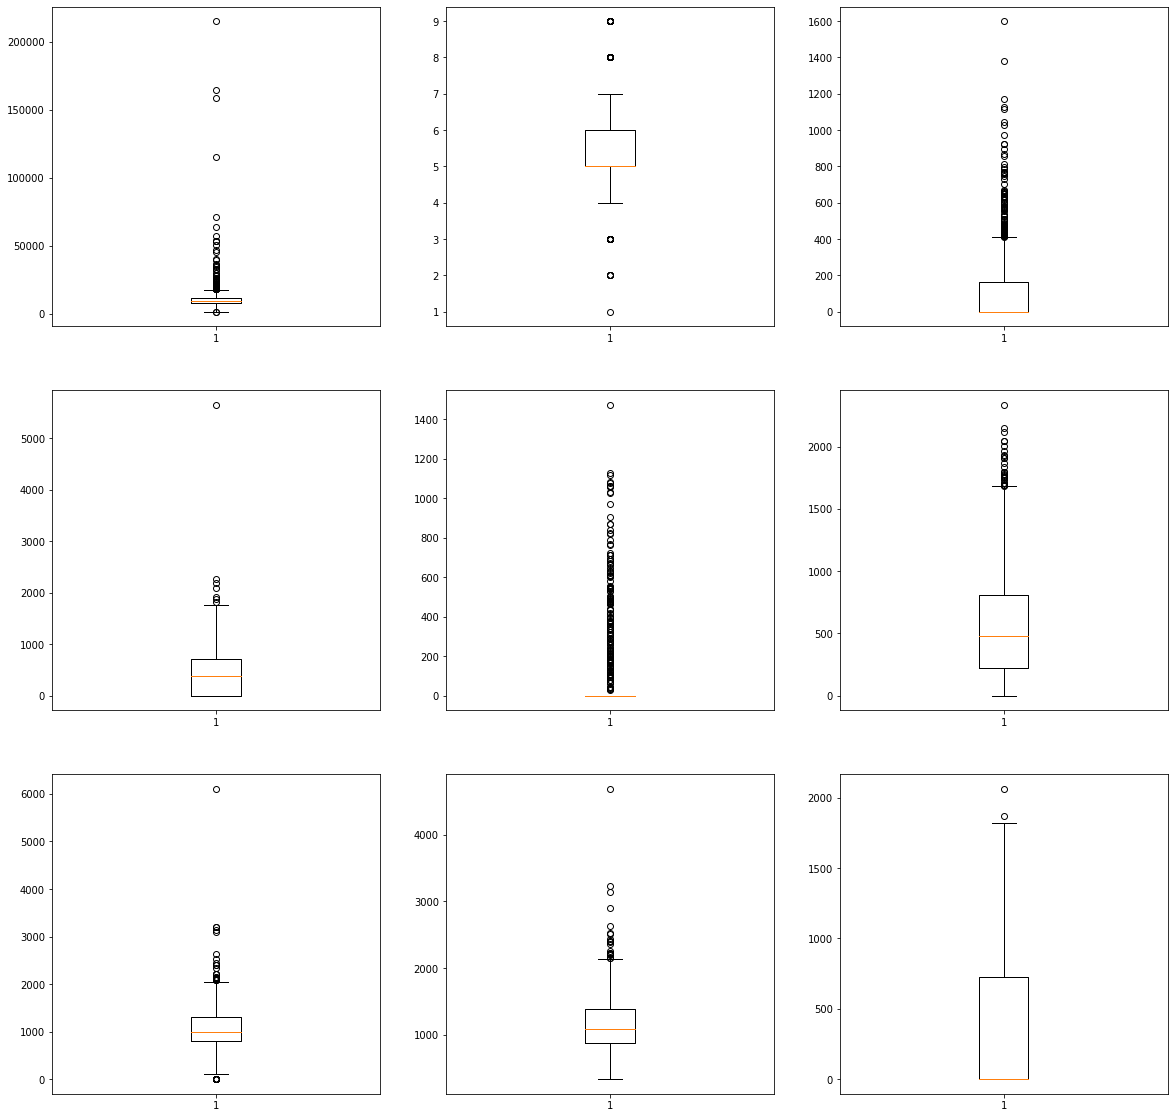

In [375]:
plt.figure(figsize=(20,20))
drawBoxPlot(housing_price_data, 'LotArea', 1)
drawBoxPlot(housing_price_data, 'OverallCond', 2)
drawBoxPlot(housing_price_data, 'MasVnrArea', 3)
drawBoxPlot(housing_price_data, 'BsmtFinSF1', 4)
drawBoxPlot(housing_price_data, 'BsmtFinSF2', 5)
drawBoxPlot(housing_price_data, 'BsmtUnfSF', 6)
drawBoxPlot(housing_price_data, 'TotalBsmtSF', 7)
drawBoxPlot(housing_price_data, '1stFlrSF', 8)
drawBoxPlot(housing_price_data, '2ndFlrSF', 9)

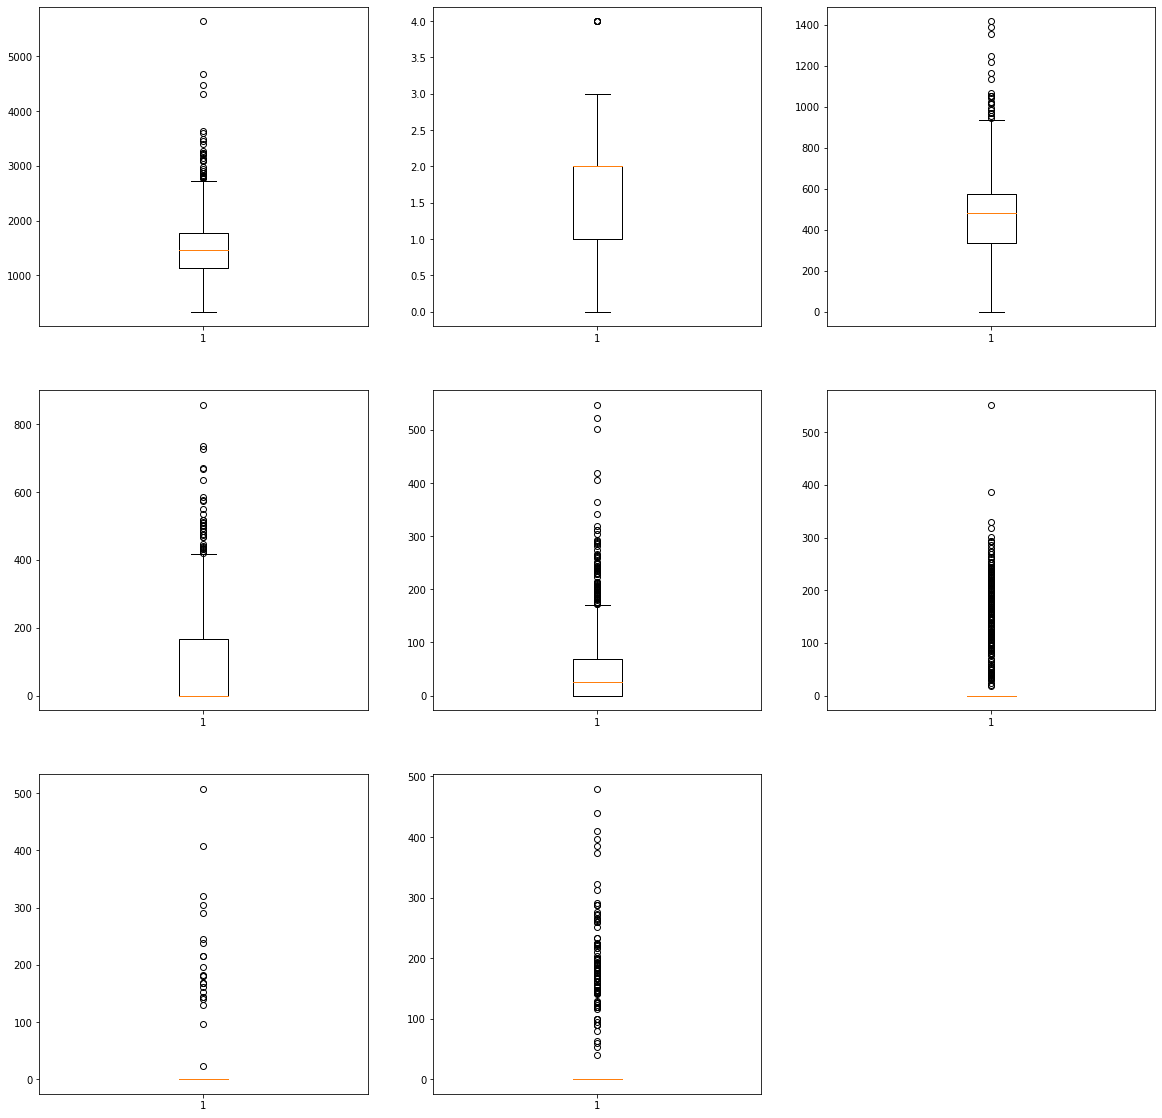

In [376]:
plt.figure(figsize=(20,20))
drawBoxPlot(housing_price_data, 'GrLivArea', 1)
drawBoxPlot(housing_price_data, 'GarageCars', 2)
drawBoxPlot(housing_price_data, 'GarageArea', 3)
drawBoxPlot(housing_price_data, 'WoodDeckSF', 4)
drawBoxPlot(housing_price_data, 'OpenPorchSF', 5)
drawBoxPlot(housing_price_data, 'EnclosedPorch', 6)
drawBoxPlot(housing_price_data, '3SsnPorch', 7)
drawBoxPlot(housing_price_data, 'ScreenPorch', 8)

#### Let's drop outliers from dataset.

In [439]:
num_col = list(housing_price_data.dtypes[housing_price_data.dtypes !='object'].index)
def drop_outliers(data):
    list = []
    for col in num_col:
        Q1 = data[col].quantile(.05)
        Q3 = data[col].quantile(.99)
        IQR = Q3-Q1
        data =  data[(data[col] >= (Q1-(1.5*IQR))) & (data[col] <= (Q3+(1.5*IQR)))] 
    return data   

housing_price_data = drop_outliers(housing_price_data)

In [440]:
housing_price_data.shape

(1440, 72)

#### Let's get list of all columns other than numerical columns and check there values. These columns can be classified into categorical values and ordinal values.

In [441]:
non_numeric_columns = list(housing_price_data.dtypes[housing_price_data.dtypes == 'object'].index)
non_numeric_columns

['MSZoning',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [442]:
housing_price_data[['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 
                    'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 
                    'MasVnrType','ExterQual', 'ExterCond', 'Foundation', 'ExterQual']].head()

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,ExterQual
0,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd
1,RL,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA
2,RL,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd
3,RL,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA
4,RL,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd


In [443]:
housing_price_data[['ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
                    'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 
                    'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']].head()

,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


#### By looking at values for non numerical columns and looking at values described in data dictionary, it can be seen that following columns are ordinal in nature and can be replaced by numeric values.

- LandSlope
- ExterQual
- BsmtQual
- BsmtCond
- BsmtExposure
- BsmtFinType1
- BsmtFinType2
- HeatingQC
- CentralAir
- KitchenQual
- GarageFinish
- GarageQual
- GarageCond
- ExterCond
- LotShape

#### Similarly following columns can be classified as categorical columns and we should be creating dummy columns for these.
- MSZoning
- LandContour
- LotConfig
- Neighborhood
- Condition1
- Condition2
- BldgType
- HouseStyle
- RoofStyle
- RoofMatl
- Exterior1st
- Exterior2nd
- MasVnrType
- Foundation
- Heating
- Electrical
- Functional
- GarageType
- PavedDrive
- SaleType
- SaleCondition

In [444]:
housing_price_data[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,Gtl,Gd,Gd,TA,No,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,Reg
1,Gtl,TA,Gd,TA,Gd,ALQ,Unf,Ex,Y,TA,RFn,TA,TA,TA,Reg
2,Gtl,Gd,Gd,TA,Mn,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,IR1
3,Gtl,TA,TA,Gd,No,ALQ,Unf,Gd,Y,Gd,Unf,TA,TA,TA,IR1
4,Gtl,Gd,Gd,TA,Av,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,IR1


In [445]:
housing_price_data['LandSlope'] = housing_price_data.LandSlope.map({'Gtl':0,'Mod':1,'Sev':2})
housing_price_data['ExterQual'] = housing_price_data.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_price_data['BsmtQual'] = housing_price_data.BsmtQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_price_data['BsmtCond'] = housing_price_data.BsmtCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_price_data['BsmtExposure'] = housing_price_data.BsmtExposure.map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
housing_price_data['BsmtFinType1'] = housing_price_data.BsmtFinType1.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
housing_price_data['BsmtFinType2'] = housing_price_data.BsmtFinType2.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
housing_price_data['HeatingQC'] = housing_price_data.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_price_data['CentralAir'] = housing_price_data.CentralAir.map({'N':0,'Y':1})
housing_price_data['KitchenQual'] = housing_price_data.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_price_data['GarageFinish'] = housing_price_data.GarageFinish.map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
housing_price_data['GarageQual'] = housing_price_data.GarageQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_price_data['GarageCond'] = housing_price_data.GarageCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_price_data['ExterCond'] = housing_price_data.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_price_data['LotShape'] = housing_price_data.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})

In [446]:
housing_price_data[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,0,3,4,3,1,6,1,4,1,3,2,3,3,2,3
1,0,2,4,3,4,5,1,4,1,2,2,3,3,2,3
2,0,3,4,3,2,6,1,4,1,3,2,3,3,2,0
3,0,2,3,4,1,5,1,3,1,3,1,3,3,2,0
4,0,3,4,3,3,6,1,4,1,3,2,3,3,2,0


In [447]:
housing_price_data = pd.get_dummies(housing_price_data, columns=['MSZoning'], drop_first=True)
housing_price_data = pd.get_dummies(housing_price_data, columns=['LandContour'], drop_first=True)
housing_price_data = pd.get_dummies(housing_price_data, columns=['LotConfig'], drop_first=True)
housing_price_data = pd.get_dummies(housing_price_data, columns=['Neighborhood'], drop_first=True)
housing_price_data = pd.get_dummies(housing_price_data, columns=['Condition1'], drop_first=True)
housing_price_data = pd.get_dummies(housing_price_data, columns=['Condition2'], drop_first=True)
housing_price_data = pd.get_dummies(housing_price_data, columns=['BldgType'], drop_first=True)
housing_price_data = pd.get_dummies(housing_price_data, columns=['HouseStyle'], drop_first=True)
housing_price_data = pd.get_dummies(housing_price_data, columns=['RoofStyle'], drop_first=True)
housing_price_data = pd.get_dummies(housing_price_data, columns=['RoofMatl'], drop_first=True)
housing_price_data = pd.get_dummies(housing_price_data, columns=['Exterior1st'], drop_first=True)
housing_price_data = pd.get_dummies(housing_price_data, columns=['Exterior2nd'], drop_first=True)
housing_price_data = pd.get_dummies(housing_price_data, columns=['MasVnrType'], drop_first=True)
housing_price_data = pd.get_dummies(housing_price_data, columns=['Foundation'], drop_first=True)
housing_price_data = pd.get_dummies(housing_price_data, columns=['Heating'], drop_first=True)
housing_price_data = pd.get_dummies(housing_price_data, columns=['Electrical'], drop_first=True)
housing_price_data = pd.get_dummies(housing_price_data, columns=['Functional'], drop_first=True)
housing_price_data = pd.get_dummies(housing_price_data, columns=['GarageType'], drop_first=True)
housing_price_data = pd.get_dummies(housing_price_data, columns=['PavedDrive'], drop_first=True)
housing_price_data = pd.get_dummies(housing_price_data, columns=['SaleType'], drop_first=True)
housing_price_data = pd.get_dummies(housing_price_data, columns=['SaleCondition'], drop_first=True)

housing_price_data.shape

(1440, 194)

# 3. Model building

#### Let us check the distribution of sales price before scaling and Splitting

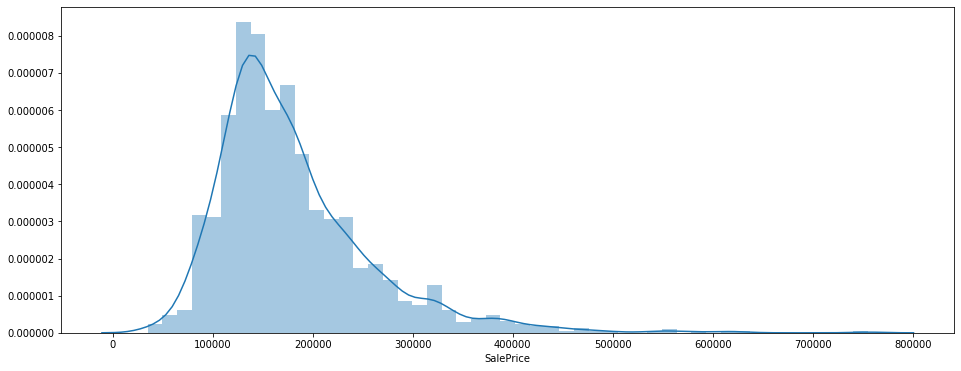

In [448]:
plt.figure(figsize=(16,6))
sns.distplot(housing_price_data.SalePrice)
plt.show()

#### Create train and test dataset for validation purpose

In [449]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

In [450]:
df_train,df_test = train_test_split(housing_price_data,train_size=0.7,test_size=0.3,random_state=50)

#### Let's scale the numeric columns using Standard scaler.

In [451]:
num_col = ['MSSubClass','LotArea','OverallQual','OverallCond',
           'MasVnrArea','BsmtFinSF1',
           'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
           'LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
           'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars',
           'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
           'ScreenPorch','PoolArea','MiscVal','SalePrice']

scaler = StandardScaler()
df_train[num_col] = scaler.fit_transform(df_train[num_col])
df_test[num_col] = scaler.transform(df_test[num_col])

#### Lets check the distribution again after scaling

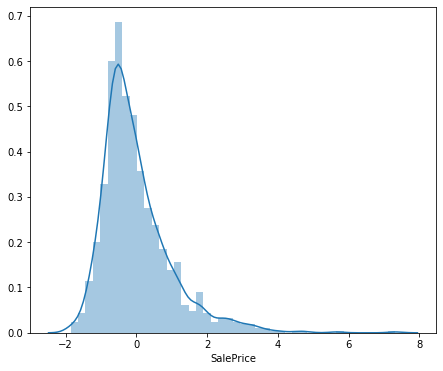

In [452]:
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.distplot(df_train.SalePrice)

#### Split the dependent and independent variable

In [453]:
y_train = df_train.pop('SalePrice')
X_train = df_train

In [454]:
y_test = df_test.pop('SalePrice')
X_test = df_test

#### Let's use Recursive feature elimination to find the optimal number of feature from dataset.

In [455]:
lm  = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,70)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=70, step=1, verbose=0)

In [456]:
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank']

In [457]:
rfe_sel_columns = list(rfe_scores[rfe_scores.Status==True].Column_Names)
rfe_sel_columns

['OverallQual',
 'ExterQual',
 'BsmtFinSF1',
 'GrLivArea',
 'KitchenQual',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'LandContour_HLS',
 'LotConfig_CulDSac',
 'LotConfig_FR3',
 'Neighborhood_BrDale',
 'Neighborhood_Edwards',
 'Neighborhood_NAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_SWISU',
 'Neighborhood_StoneBr',
 'Condition1_Norm',
 'Condition1_RRAe',
 'Condition1_RRNn',
 'Condition2_Feedr',
 'Condition2_PosN',
 'Condition2_RRAn',
 'BldgType_Twnhs',
 'BldgType_TwnhsE',
 'HouseStyle_1Story',
 'HouseStyle_2.5Fin',
 'HouseStyle_SFoyer',
 'HouseStyle_SLvl',
 'RoofStyle_Shed',
 'RoofMatl_Membran',
 'RoofMatl_WdShngl',
 'Exterior1st_BrkComm',
 'Exterior1st_BrkFace',
 'Exterior1st_CemntBd',
 'Exterior1st_HdBoard',
 'Exterior1st_Plywood',
 'Exterior1st_VinylSd',
 'Exterior1st_Wd Sdng',
 'Exterior2nd_Brk Cmn',
 'Exterior2nd_CmentBd',
 'Exterior2nd_Plywood',
 'Exterior2nd_VinylSd',
 'Exterior2nd_Wd Sdng',
 'MasVnrTyp

#### Lets filter the train and test set for the RFE selected columns

In [458]:
X_train = X_train[rfe_sel_columns]
X_test = X_test[rfe_sel_columns]

### Build model using Lasso regression

Let's build an initial model with alpha value .001 and see the accuracy of model.

In [459]:
lm = Lasso(alpha=0.001)
lm.fit(X_train,y_train)

y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred  = lm.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8905565995960353
0.8602511039090407


In [460]:
model_parameter = list(lm.coef_)
model_parameter.insert(0,lm.intercept_)
model_parameter = [round(x,3) for x in model_parameter]
col = df_train.columns
col.insert(0,'Constant')
list(zip(col,model_parameter))

[('MSSubClass', -1.32),
 ('LotArea', 0.234),
 ('LotShape', 0.153),
 ('LandSlope', 0.188),
 ('OverallQual', 0.422),
 ('OverallCond', 0.132),
 ('MasVnrArea', 0.204),
 ('ExterQual', -0.0),
 ('ExterCond', 0.1),
 ('BsmtQual', -0.0),
 ('BsmtCond', 0.204),
 ('BsmtExposure', 0.177),
 ('BsmtFinType1', -0.0),
 ('BsmtFinSF1', 0.061),
 ('BsmtFinType2', -0.187),
 ('BsmtFinSF2', -0.1),
 ('BsmtUnfSF', 0.468),
 ('TotalBsmtSF', 0.458),
 ('HeatingQC', -0.121),
 ('CentralAir', -0.159),
 ('1stFlrSF', 0.432),
 ('2ndFlrSF', 0.109),
 ('LowQualFinSF', -0.158),
 ('GrLivArea', 0.0),
 ('BsmtFullBath', -0.0),
 ('BsmtHalfBath', -1.866),
 ('FullBath', -0.0),
 ('HalfBath', -0.319),
 ('BedroomAbvGr', -0.256),
 ('KitchenAbvGr', 0.17),
 ('KitchenQual', -0.175),
 ('TotRmsAbvGrd', 0.121),
 ('Fireplaces', 0.084),
 ('GarageFinish', 0.0),
 ('GarageCars', 0.0),
 ('GarageArea', 1.088),
 ('GarageQual', -0.0),
 ('GarageCond', 0.106),
 ('WoodDeckSF', 0.073),
 ('OpenPorchSF', -0.074),
 ('EnclosedPorch', -0.01),
 ('3SsnPorch', -0.

#### Now lets try to improve our model with the optimal value of alpha using GridSearchCV

In [461]:
folds = KFold(n_splits=10,shuffle=True,random_state=50)

hyper_param = {'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]}

model = Lasso()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    0.5s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=50, shuffle=True),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [462]:
cv_result_l = pd.DataFrame(model_cv.cv_results_)
cv_result_l['param_alpha'] = cv_result_l['param_alpha'].astype('float32')
cv_result_l.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.004888,0.001314,0.001511,0.000513,0.001,{'alpha': 0.001},0.596573,0.889585,0.859467,0.889099,...,0.892276,0.890804,0.892777,0.886973,0.890170,0.898429,0.888836,0.891511,0.892654,0.004944
1,0.005955,0.001594,0.001912,0.000546,0.010,{'alpha': 0.01},0.521351,0.864023,0.815409,0.852678,...,0.842197,0.838269,0.840888,0.835840,0.837105,0.835117,0.835725,0.838716,0.840250,0.008685
2,0.004130,0.001251,0.001752,0.000657,0.100,{'alpha': 0.1},0.579838,0.804100,0.714682,0.777886,...,0.776160,0.774396,0.775563,0.765455,0.771042,0.768732,0.765745,0.772450,0.773508,0.009781
3,0.004520,0.000964,0.001524,0.000416,1.000,{'alpha': 1.0},-0.001862,-0.000035,-0.020040,-0.000787,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.004579,0.001085,0.001525,0.000456,5.000,{'alpha': 5.0},-0.001862,-0.000035,-0.020040,-0.000787,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


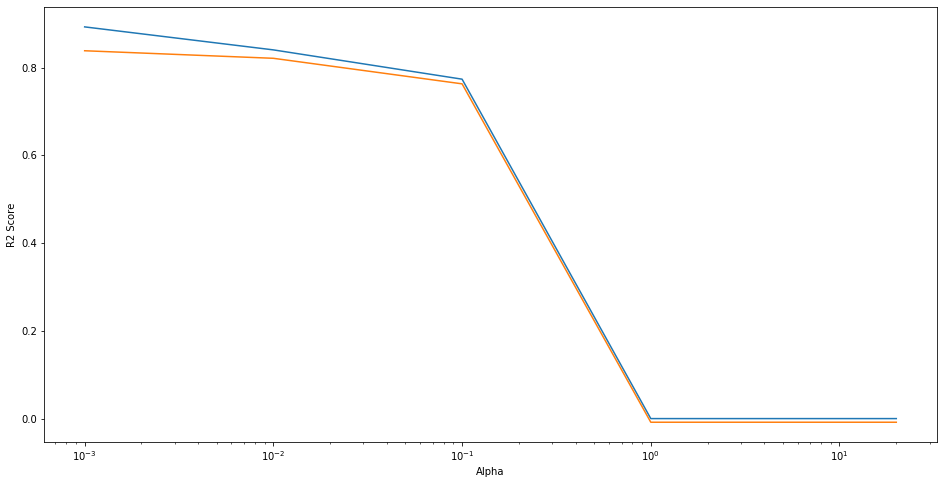

In [463]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_train_score'])
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [464]:
#Check the best alpha value
model_cv.best_params_

{'alpha': 0.001}

In [465]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

### Build model using Ridge regression

Let's build an initial model with alpha value .001 and see the accuracy of model.

In [466]:
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))
y_test_pred = ridge.predict(X_test)
print(r2_score(y_test,y_test_pred))

0.8996142674735554
0.8501236679721298


#### Lets try to improve our model with the optimal value of alpha using GridSearchCV

In [467]:
folds  = KFold(n_splits=10,shuffle=True,random_state=50)

hyper_param = {'alpha':[0.001,0.01,0.1,0.2,0.5,0.9,1.0, 5.0, 10.0,20.0]}

model = Ridge()

model_cv = GridSearchCV(estimator=model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.8s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=50, shuffle=True),
             error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1.0, 5.0,
                                   10.0, 20.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [468]:
cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.003406,0.000528,0.001284,0.000433,0.001,{'alpha': 0.001},0.574070,0.889941,0.849043,0.878079,...,0.900355,0.899665,0.901246,0.895934,0.900434,0.908187,0.897938,0.900995,0.901774,0.004862
1,0.004285,0.000794,0.001116,0.000296,0.010,{'alpha': 0.01},0.575317,0.889968,0.849354,0.878634,...,0.900354,0.899664,0.901245,0.895933,0.900432,0.908183,0.897937,0.900994,0.901773,0.004861
2,0.004554,0.001768,0.001419,0.000643,0.100,{'alpha': 0.1},0.584457,0.890209,0.851889,0.882946,...,0.900271,0.899547,0.901144,0.895842,0.900331,0.907871,0.897846,0.900893,0.901651,0.004826
3,0.003424,0.001009,0.001384,0.000496,0.200,{'alpha': 0.2},0.590286,0.890426,0.853844,0.886031,...,0.900061,0.899269,0.900896,0.895617,0.900080,0.907148,0.897620,0.900645,0.901359,0.004758
4,0.005475,0.002213,0.001612,0.000608,0.500,{'alpha': 0.5},0.597353,0.890885,0.857034,0.890731,...,0.899063,0.898036,0.899754,0.894579,0.898897,0.904206,0.896542,0.899503,0.900069,0.004591


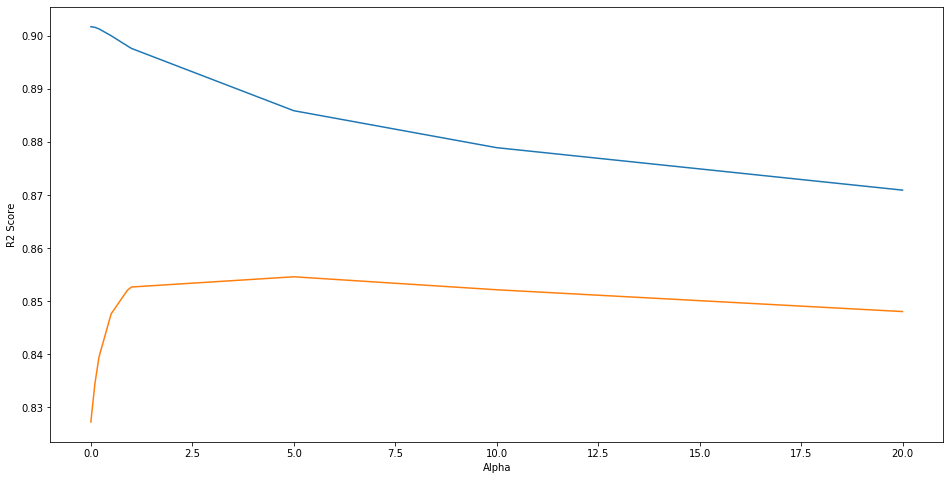

In [469]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.show()

#### On the basis of above graph lets create the model

In [470]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 5.0}

In [471]:
ridge = Ridge(alpha = 5.0)
ridge.fit(X_train,y_train)

Ridge(alpha=5.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

# 4. Prediction and evaluation on dataset

#### Best alpha value for Lasso model is .001. Let's find out the r2 scores for this model on training and test data.

In [472]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Feature','Coef']
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Feature,Coef
35,GarageArea,1.088436
16,BsmtUnfSF,0.468421
17,TotalBsmtSF,0.458132
20,1stFlrSF,0.432056
67,Neighborhood_Edwards,0.424072
4,OverallQual,0.422182
1,LotArea,0.234486
10,BsmtCond,0.203822
6,MasVnrArea,0.203795
3,LandSlope,0.187811


In [473]:
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8905565995960353
0.8602511039090407


Text(0, 0.5, 'y_test_pred')

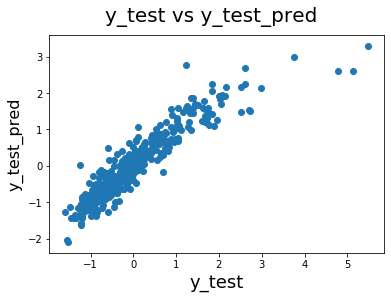

In [412]:
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)

Text(0.5, 0.98, 'Actual and Predicted')

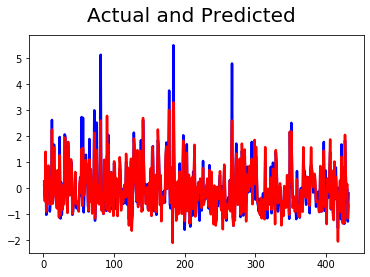

In [413]:
fig = plt.figure()
c = [i for i in range(1,433,1)]
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_test_pred, color="red", linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20) 

#### Best alpha value for Ridge model is 5.0. Let's find out the r2 scores for this model on training and test data.

In [414]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feature','Coef']
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
35,GarageArea,0.534954
16,BsmtUnfSF,0.440423
4,OverallQual,0.424997
17,TotalBsmtSF,0.414152
20,1stFlrSF,0.389827
67,Neighborhood_Edwards,0.254699
1,LotArea,0.232343
58,LotConfig_FR2,0.219930
10,BsmtCond,0.207274
6,MasVnrArea,0.197467


In [415]:
y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.8854639822542929
0.8565328221538033


Text(0, 0.5, 'y_test_pred')

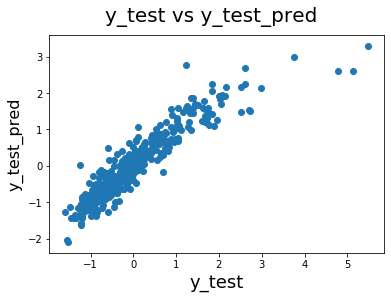

In [416]:
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)

Text(0.5, 0.98, 'Actual and Predicted')

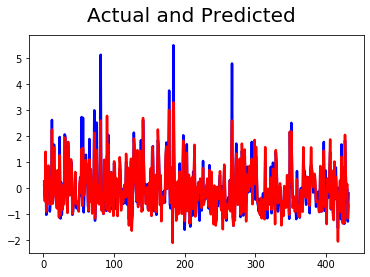

In [417]:
fig = plt.figure()
c = [i for i in range(1,433,1)]
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_test_pred, color="red", linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20) 

r2_scores are good (approximate .86 for both models) on test data set which are almost same as r2 scores obtained on training data set (.89 and .88). Hence model is doing well on new/test data as well. Also plot between actual test values and predicted test values is showing that model is doing good prediction on test data.

After compairing both the model it can be concluded that the below Features are best explaining the DataSet.
- GarageArea
- BsmtUnfSF
- OverallQual
- TotalBsmtSF
- 1stFlrSF